# Geotiff-Generator demo

### This is a short notebook to demonstrate use of the `tiff_maker`
This is the core  Python function of geotiff-generator. 

For the purpose of this demo I have extracted a subset of emodnet bathymetry around Norfolk adn included it with the repo.

In [1]:
# Import the necessarray modules and find the path to the notebook
# We import the function `tiff_maker` to make our tiff image
import xarray as xr
from pathlib import Path 
from PIL import Image
notebook_dir = Path.cwd()
from geotiff_gen import tiff_maker

In [2]:
# Import the sample bathymetry data
bathy_ds = xr.open_dataset(notebook_dir / 'norfolk_bathy.nc')
bathy_lon, bathy_lat, bathy_h = bathy_ds.bathymetry.longitude, bathy_ds.bathymetry.latitude, bathy_ds.bathymetry.values

bathy_lon, bathy_lat and bathy_h are numpy arrrys. You can input your own bathy data in their place. Height is positive up from sea level so depths are negative. np.nan values will be interpereted as land

In [3]:
## Uncomment to check out the bathy_h nyumpy array
#print(type(bathy_h))
#bathy_h

By explicitly passing all necessary variables: (filename, lon, lat and bathy arrays, a color theme and a minimum depth), the script will run autonomously

In [4]:
tiff_maker(filename='norfolk', lon=bathy_lon, lat=bathy_lat, bathy=bathy_h,theme='y',min_depth=10)

Generating geotiff...
Made geotiff file at: /media/callum/storage/Documents/foo/geotiff-generator/norfolk.tif


### This generates a geotiff image of the bathymetry around Norfolk

Let's look at it (I've used PIL here, if PIL is not installed on your system, you can just open the file norfolk.tif with an image viewer)

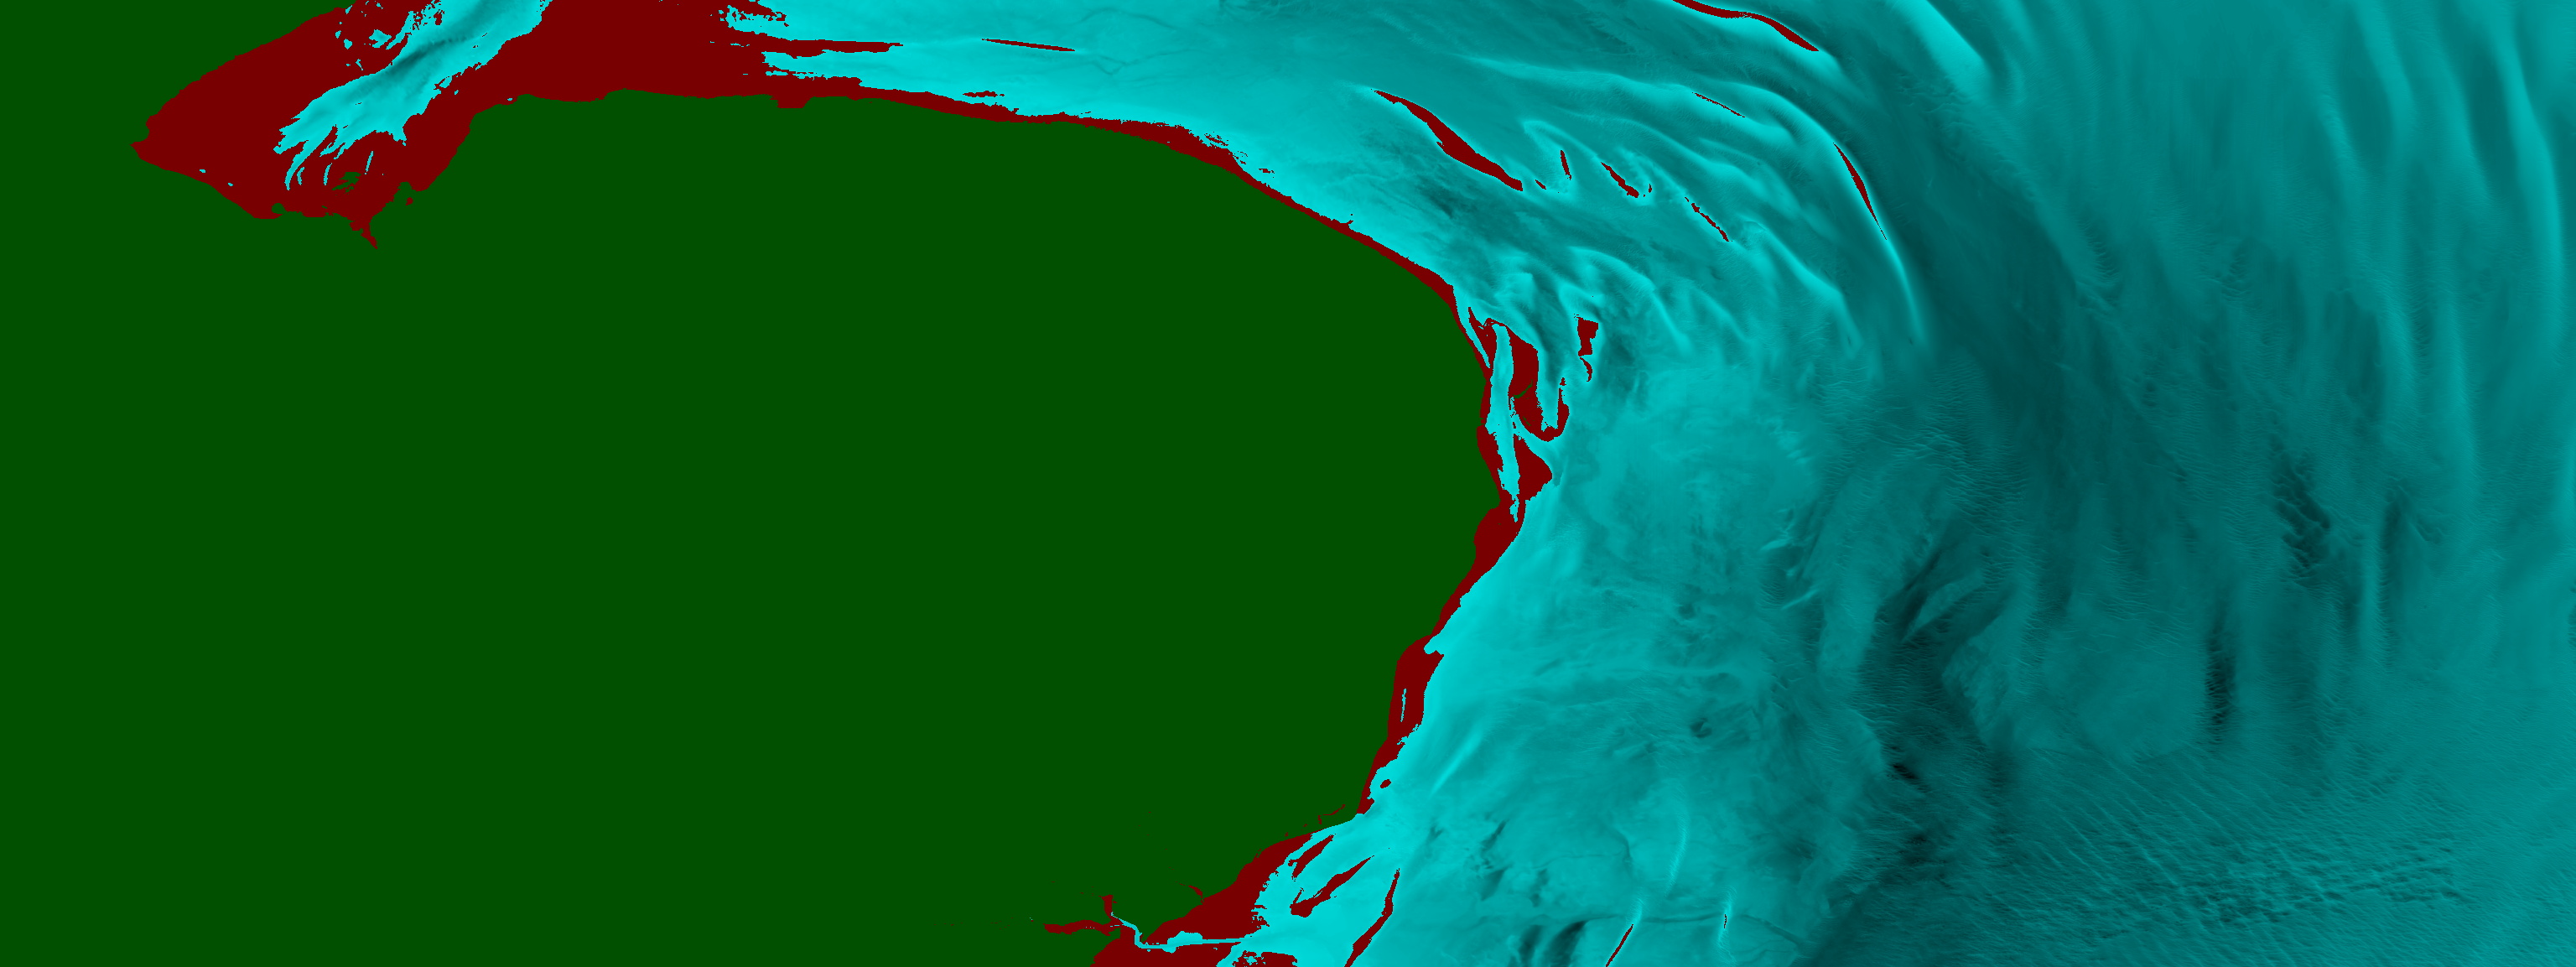

In [5]:
Image.open(notebook_dir / "norfolk.tif")

With the color theme 'y' and min_depth 10 specified, this colors the land dark green and water shallower than 10 m dark red. Remaining depths are a scale of blue/green. Shallow water is light, deep water is dark.The colour scale is autoscaled to local bathymetry

If we leave out the last two arguments, the script will ask you for your desired settings when making the tiff color bands

In [6]:
tiff_maker(filename='norfolk_light', lon=bathy_lon, lat=bathy_lat, bathy=bathy_h)

Would you like the geotiff in a dark theme?
[y]es please, I love dark themed UI elements
[n]ah just melt my eyeballs out
[g]reyscale for true bathymetry
n
What depth (m) would you like the shallow warning red set? (0 for no shallow warning) 
10
Generating geotiff...
Made geotiff file at: /media/callum/storage/Documents/foo/geotiff-generator/norfolk_light.tif


### Here's the image created with the arguments specified above

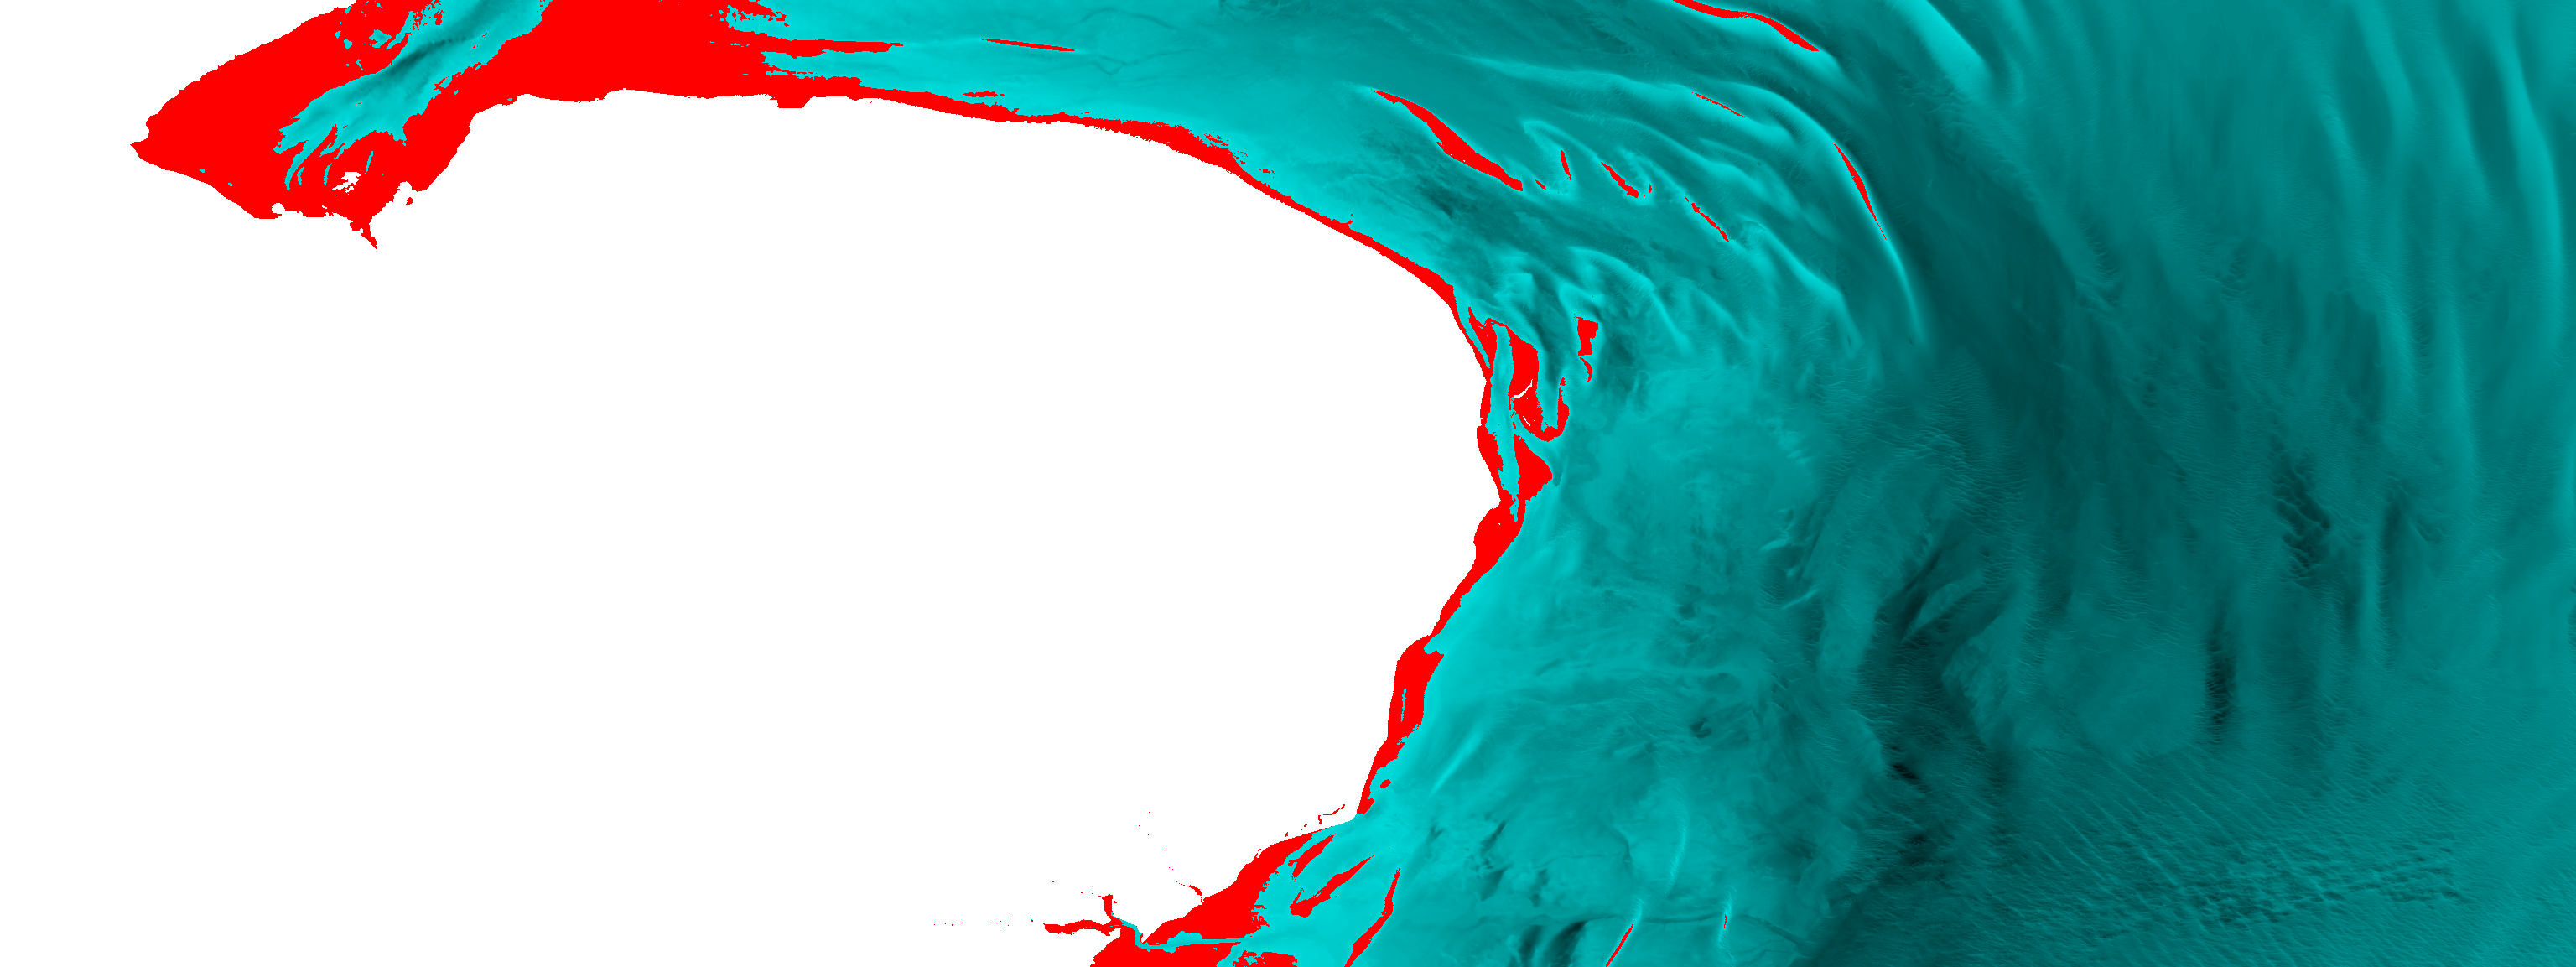

In [7]:
Image.open(notebook_dir / "norfolk_light.tif")

If we call `tiff_maker` with no arguments it will run in interactive mode and ask you for all the data. If you are running this notebook locally, you can follow the menu options to pass it a path to your emodnet or GEBCO bathymetry data. See below for an example using a folder of EMODnet data to display waters near the Belgian coast.

In [8]:
tiff_maker()

Enter a name for your bathymetry geotiff VLIZ
Enter the southern limit of your desired bathy 51
Enter the northern limit of your desired bathy 52
Enter the western limit of your desired bathy 2
Enter the eastern limit of your desired bathy 4
What bathy are you using? [g]ebco, [e]modnet or [o]ther e
Enter the path to the folder with your emodnet file(s) (E3.dtm etc). Press 'f' for a folder selector app  /media/callum/storage/Documents/global_datasets/emod_netcdf/
Searching recursivly for emod *.dtm bathy files in /media/callum/storage/Documents/global_datasets/emod_netcdf/
Bathymetry data contained in 2 files. Fetching...
base tile E4
adding tile E5
start new column...
combining columns
Bathy parsed successfully
Would you like the geotiff in a dark theme?
[y]es please, I love dark themed UI elements
[n]ah just melt my eyeballs out
[g]reyscale for true bathymetry
y
What depth (m) would you like the shallow warning red set? (0 for no shallow warning) 
0
Generating geotiff...
Made geotiff 

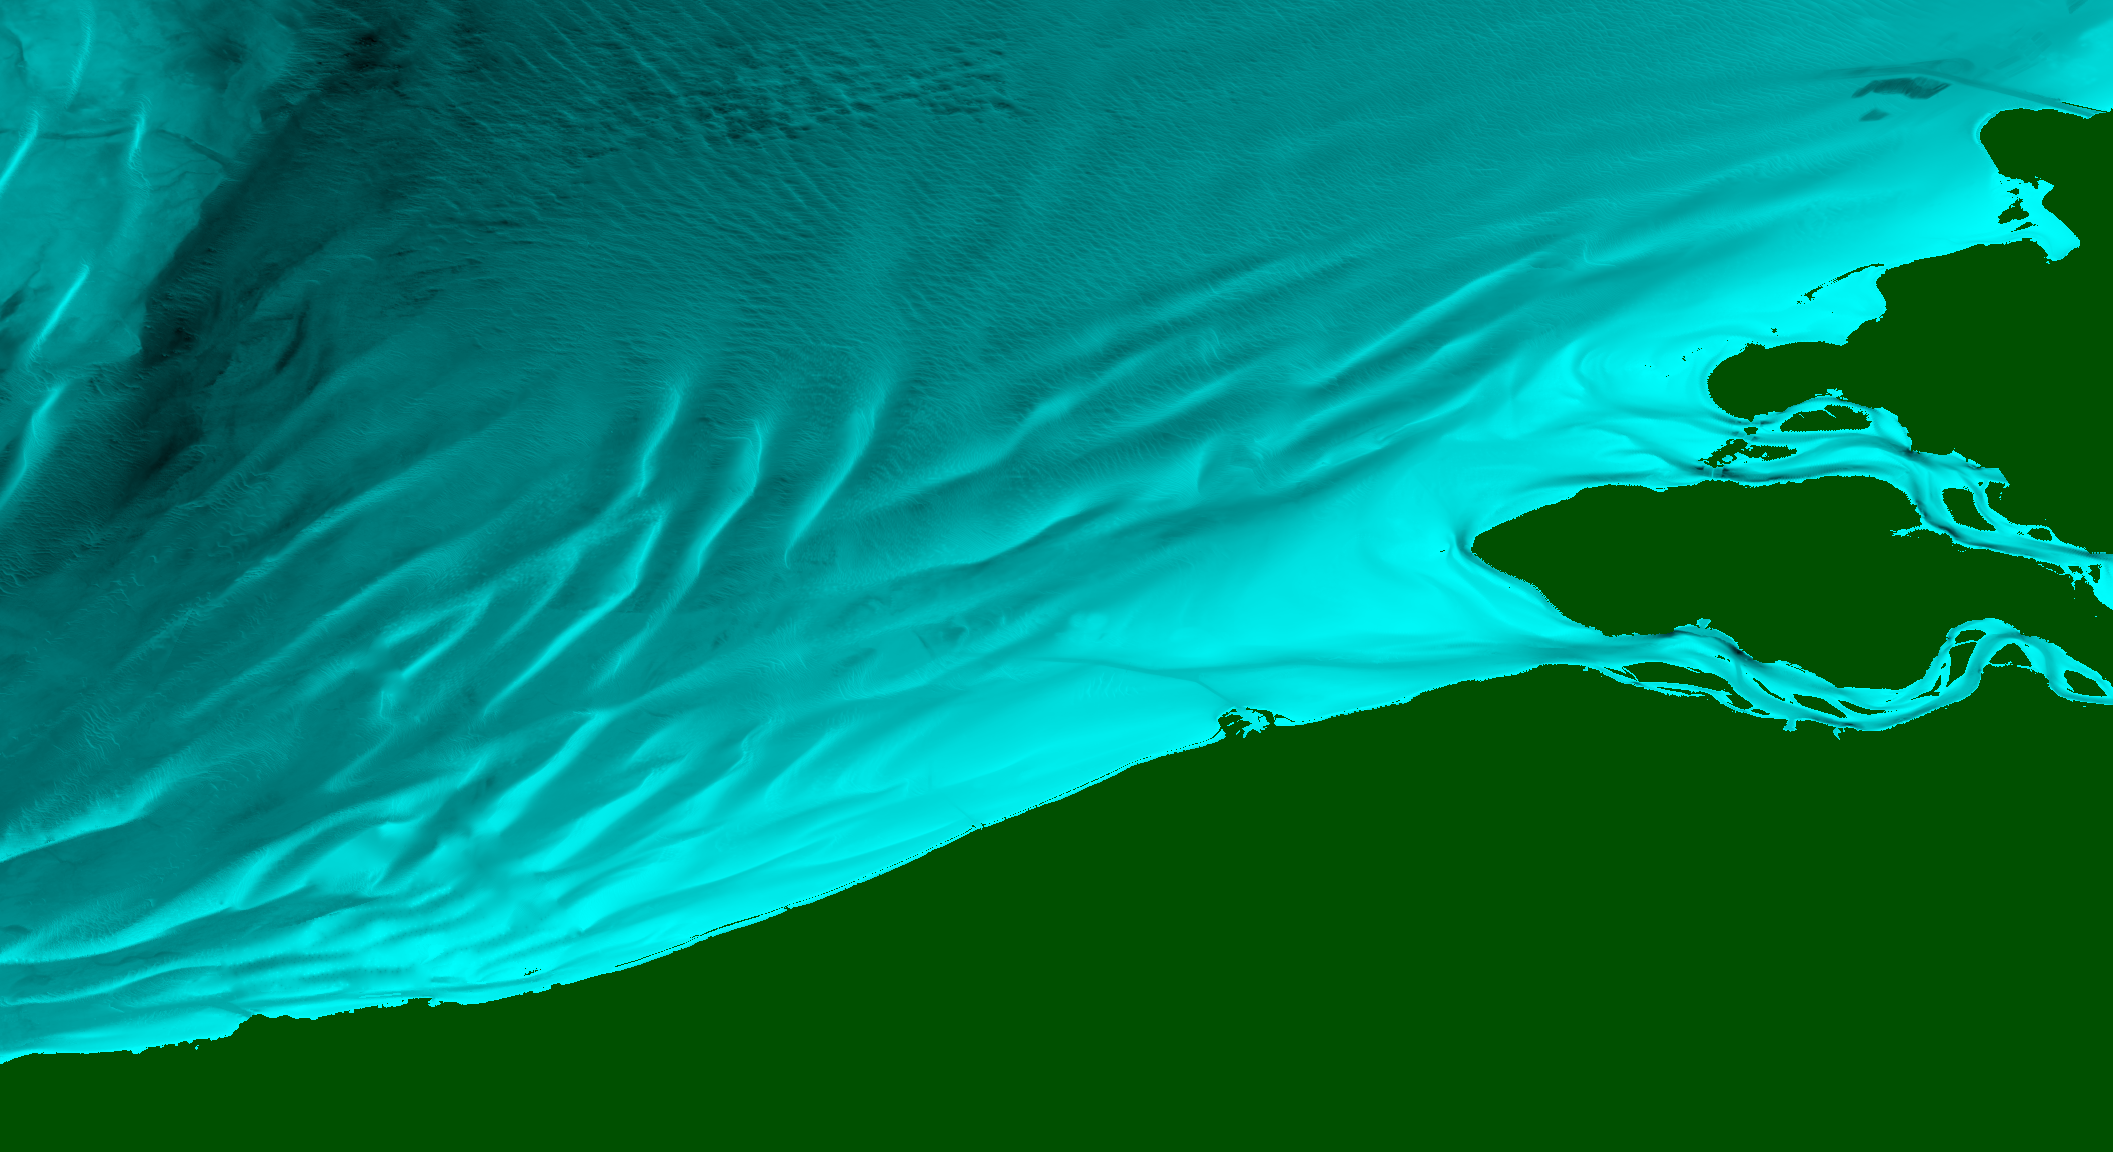

In [9]:
Image.open(notebook_dir / "VLIZ.tif")

After trying out this demo I encourage you to read the functions `tiff_maker` and `bathy_to_tiff`, both in the file geotiff_gen.py. They are short and (fairly) well commented. You can then call the function with a single command and not need to re-enter information, as demonstrated in the following cell.

You must pass either arrays of lon, lat and bathymetry (as in the first example in this notebook) or a path to gebco or emodnet files

In [12]:
tiff_maker(filename='my_geotiff', extent=(51,54,0,4), bathy_type='e', bathy_folder_path='/media/callum/storage/Documents/global_datasets/emod_netcdf/',theme='y',min_depth=0)

Searching recursivly for emod *.dtm bathy files in /media/callum/storage/Documents/global_datasets/emod_netcdf/
Bathymetry data contained in 4 files. Fetching...
base tile D4
adding tile E4
patching NS...
adding tile D5
start new column...
adding tile E5
patching NS...
combining columns
Bathy parsed successfully
Generating geotiff...
Made geotiff file at: /media/callum/storage/Documents/foo/geotiff-generator/my_geotiff.tif
